<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualization-of-features" data-toc-modified-id="Visualization-of-features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualization of features</a></span><ul class="toc-item"><li><span><a href="#Discussion:-Why-might-there-by-bimodal-distributions-in-a-chemical-process?" data-toc-modified-id="Discussion:-Why-might-there-by-bimodal-distributions-in-a-chemical-process?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Discussion: Why might there by bimodal distributions in a chemical process?</a></span></li></ul></li><li><span><a href="#Scaling-Features-and-Outputs" data-toc-modified-id="Scaling-Features-and-Outputs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scaling Features and Outputs</a></span><ul class="toc-item"><li><span><a href="#Discussion:-What-could-go-wrong-with-rescaling-or-mean-scaling?" data-toc-modified-id="Discussion:-What-could-go-wrong-with-rescaling-or-mean-scaling?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Discussion: What could go wrong with rescaling or mean scaling?</a></span></li></ul></li><li><span><a href="#Multi-Linear-Regression" data-toc-modified-id="Multi-Linear-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multi-Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Discussion:-How-many-features-would-result-if-third-order-interactions-were-considered?" data-toc-modified-id="Discussion:-How-many-features-would-result-if-third-order-interactions-were-considered?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Discussion: How many features would result if third-order interactions were considered?</a></span></li></ul></li><li><span><a href="#Dimensionality-Reduction" data-toc-modified-id="Dimensionality-Reduction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dimensionality Reduction</a></span><ul class="toc-item"><li><span><a href="#Forward-Selection" data-toc-modified-id="Forward-Selection-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Forward Selection</a></span></li><li><span><a href="#Exercise:-Use-forward-selection-to-determine-the-minimum-number-of-features-needed-to-get-an-$r^2=0.65$." data-toc-modified-id="Exercise:-Use-forward-selection-to-determine-the-minimum-number-of-features-needed-to-get-an-$r^2=0.65$.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exercise: Use forward selection to determine the minimum number of features needed to get an $r^2=0.65$.</a></span></li></ul></li><li><span><a href="#Principal-Component-Regression" data-toc-modified-id="Principal-Component-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Principal Component Regression</a></span><ul class="toc-item"><li><span><a href="#Discussion:-Why-is-the-model-with-principal-components-not-always-better-than-direct-linear-regression?" data-toc-modified-id="Discussion:-Why-is-the-model-with-principal-components-not-always-better-than-direct-linear-regression?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Discussion: Why is the model with principal components not always better than direct linear regression?</a></span></li></ul></li></ul></div>

# High-dimensional Data

So far we have only worked with datasets that have a single input dimension. We have generated "features" from this dimension, but we have not considered the case of a problem where multiple inputs are given. This is a very common scenario, and one of the main advantages of many machine-learning methods is that they work well for "high-dimesional" data, or data with many features.

In this lecture we will work with a dataset of chemical process data provided by Dow Chemical. The data comes from a generic chemical process with the following setup:

<img src="images/dow_process.png" width="800">

The dataset contains a number of operating conditions for each of the units in the process, as well as the concentration of impurities in the output stream. Let's take a look:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt

df = pd.read_excel('data/impurity_dataset-training.xlsx')
df.head(10) #<- shows the first 10 entries

,Date,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,...,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
0,2015-12-01 00:00:00,327.813,45.7920,2095.06,2156.01,98.5005,95.4674,54.3476,41.0121,52.2353,...,62.8707,45.0085,66.6604,8.68813,99.9614,5.38024,1.49709,1.77833,3.32803,0.291226
1,2015-12-01 01:00:00,322.970,46.1643,2101.00,2182.90,98.0014,94.9673,54.2247,41.0076,52.5378,...,62.8651,45.0085,66.5496,8.70683,99.8637,5.33345,1.51392,1.76964,3.29556,0.294044
2,2015-12-01 02:00:00,319.674,45.9927,2102.96,2151.39,98.8229,96.0785,54.6130,41.0451,52.0159,...,62.8656,45.0085,66.0599,8.69269,100.2490,5.37677,1.50634,1.76095,3.23481,0.300552
3,2015-12-01 03:00:00,327.223,46.0960,2101.37,2172.14,98.7733,96.1223,54.9153,41.0405,52.9477,...,62.8669,45.0085,67.9697,8.70482,100.3200,5.32315,1.47935,1.75226,3.31287,0.293752
4,2015-12-01 04:00:00,331.177,45.8493,2114.06,2157.77,99.3231,94.7521,54.0925,40.9934,53.0507,...,62.8673,45.0085,67.6454,8.70077,100.6590,5.28227,1.44489,1.74357,3.33435,0.286107
5,2015-12-01 05:00:00,328.884,46.0729,2100.26,2134.76,99.3376,95.4188,53.9989,41.0217,53.0389,...,62.8690,45.0085,67.6828,8.69795,100.8260,5.28510,1.51144,1.73488,3.31077,0.290129
6,2015-12-01 06:00:00,327.335,46.0581,2101.57,2191.37,98.9044,94.9811,54.0685,41.0499,52.8279,...,62.8720,45.0085,66.0828,8.70780,100.3580,5.35512,1.51096,1.72619,3.30961,0.290165
7,2015-12-01 07:00:00,329.935,45.9708,2099.27,2133.95,99.6756,94.8352,54.0001,40.9886,52.7697,...,62.8694,45.0085,67.5438,8.69391,101.1360,5.31343,1.51180,1.71750,3.31009,0.287436
8,2015-12-01 08:00:00,329.128,45.8875,2099.12,2055.11,98.8823,95.0573,53.9876,41.0169,52.8802,...,62.8690,45.0085,66.9394,8.70810,100.3630,5.35183,1.48168,1.70881,3.32848,0.288816
9,2015-12-01 09:00:00,327.686,45.8192,2109.75,2185.82,98.8448,95.5414,54.0806,41.0029,53.0875,...,62.8690,45.0085,65.5845,8.69685,100.2790,5.31385,1.51268,1.70012,3.31516,0.291564


In order to work with this data we need to "clean" it to remove missing values. We will come back to this in the "data management" module. For now, just run the cell below and it will create a matrix `X` of inputs and `y` of impurity concentrations:

In [2]:
def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis=1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype='float') #drop the last 5 cols that are not inputs
y = np.array(all_data[real_rows,-3], dtype='float')
y = y.reshape(-1,1)
print(X.shape, y.shape)

(10297, 40) (10297, 1)


This is the dataset we will work with. We have 10297 data points, with 40 input variables (features) and one output variable. We can pull the names of the features (and output) in case we forget later:

In [3]:
x_names = [str(x) for x in df.columns[1:41]]
y_name = str(df.columns[-3])
print(y_name)
x_names

y:Impurity


['x1:Primary Column Reflux Flow',
 'x2:Primary Column Tails Flow',
 'x3:Input to Primary Column Bed 3 Flow',
 'x4:Input to Primary Column Bed 2 Flow',
 'x5:Primary Column Feed Flow from Feed Column',
 'x6:Primary Column Make Flow',
 'x7:Primary Column Base Level',
 'x8:Primary Column Reflux Drum Pressure',
 'x9:Primary Column Condenser Reflux Drum Level',
 'x10:Primary Column Bed1 DP',
 'x11:Primary Column Bed2 DP',
 'x12:Primary Column Bed3 DP',
 'x13:Primary Column Bed4 DP',
 'x14:Primary Column Base Pressure',
 'x15:Primary Column Head Pressure',
 'x16:Primary Column Tails Temperature',
 'x17:Primary Column Tails Temperature 1',
 'x18:Primary Column Bed 4 Temperature',
 'x19:Primary Column Bed 3 Temperature',
 'x20:Primary Column Bed 2 Temperature',
 'x21:Primary Column Bed 1 Temperature',
 'x22: Secondary Column Base Concentration',
 'x23: Flow from Input to Secondary Column',
 'x24: Secondary Column Tails Flow',
 'x25: Secondary Column Tray DP',
 'x26: Secondary Column Head Pressu

Don't worry if all this code doesn't make sense, we will revisit `pandas` in more detail later. The goal is to predict the output, impurity, as a function of all the input variables.

## Visualization of features

Unlike working with a single variable where we can plot "x vs. y", but it is difficult to get a feel for higher-dimension data since it is hard to visualize. One good thing to start with is looking at histograms of each input variable:

X dimensions: (10297, 40)
Feature names: ['x1:Primary Column Reflux Flow', 'x2:Primary Column Tails Flow', 'x3:Input to Primary Column Bed 3 Flow', 'x4:Input to Primary Column Bed 2 Flow', 'x5:Primary Column Feed Flow from Feed Column', 'x6:Primary Column Make Flow', 'x7:Primary Column Base Level', 'x8:Primary Column Reflux Drum Pressure', 'x9:Primary Column Condenser Reflux Drum Level', 'x10:Primary Column Bed1 DP', 'x11:Primary Column Bed2 DP', 'x12:Primary Column Bed3 DP', 'x13:Primary Column Bed4 DP', 'x14:Primary Column Base Pressure', 'x15:Primary Column Head Pressure', 'x16:Primary Column Tails Temperature', 'x17:Primary Column Tails Temperature 1', 'x18:Primary Column Bed 4 Temperature', 'x19:Primary Column Bed 3 Temperature', 'x20:Primary Column Bed 2 Temperature', 'x21:Primary Column Bed 1 Temperature', 'x22: Secondary Column Base Concentration', 'x23: Flow from Input to Secondary Column', 'x24: Secondary Column Tails Flow', 'x25: Secondary Column Tray DP', 'x26: Secondary Co

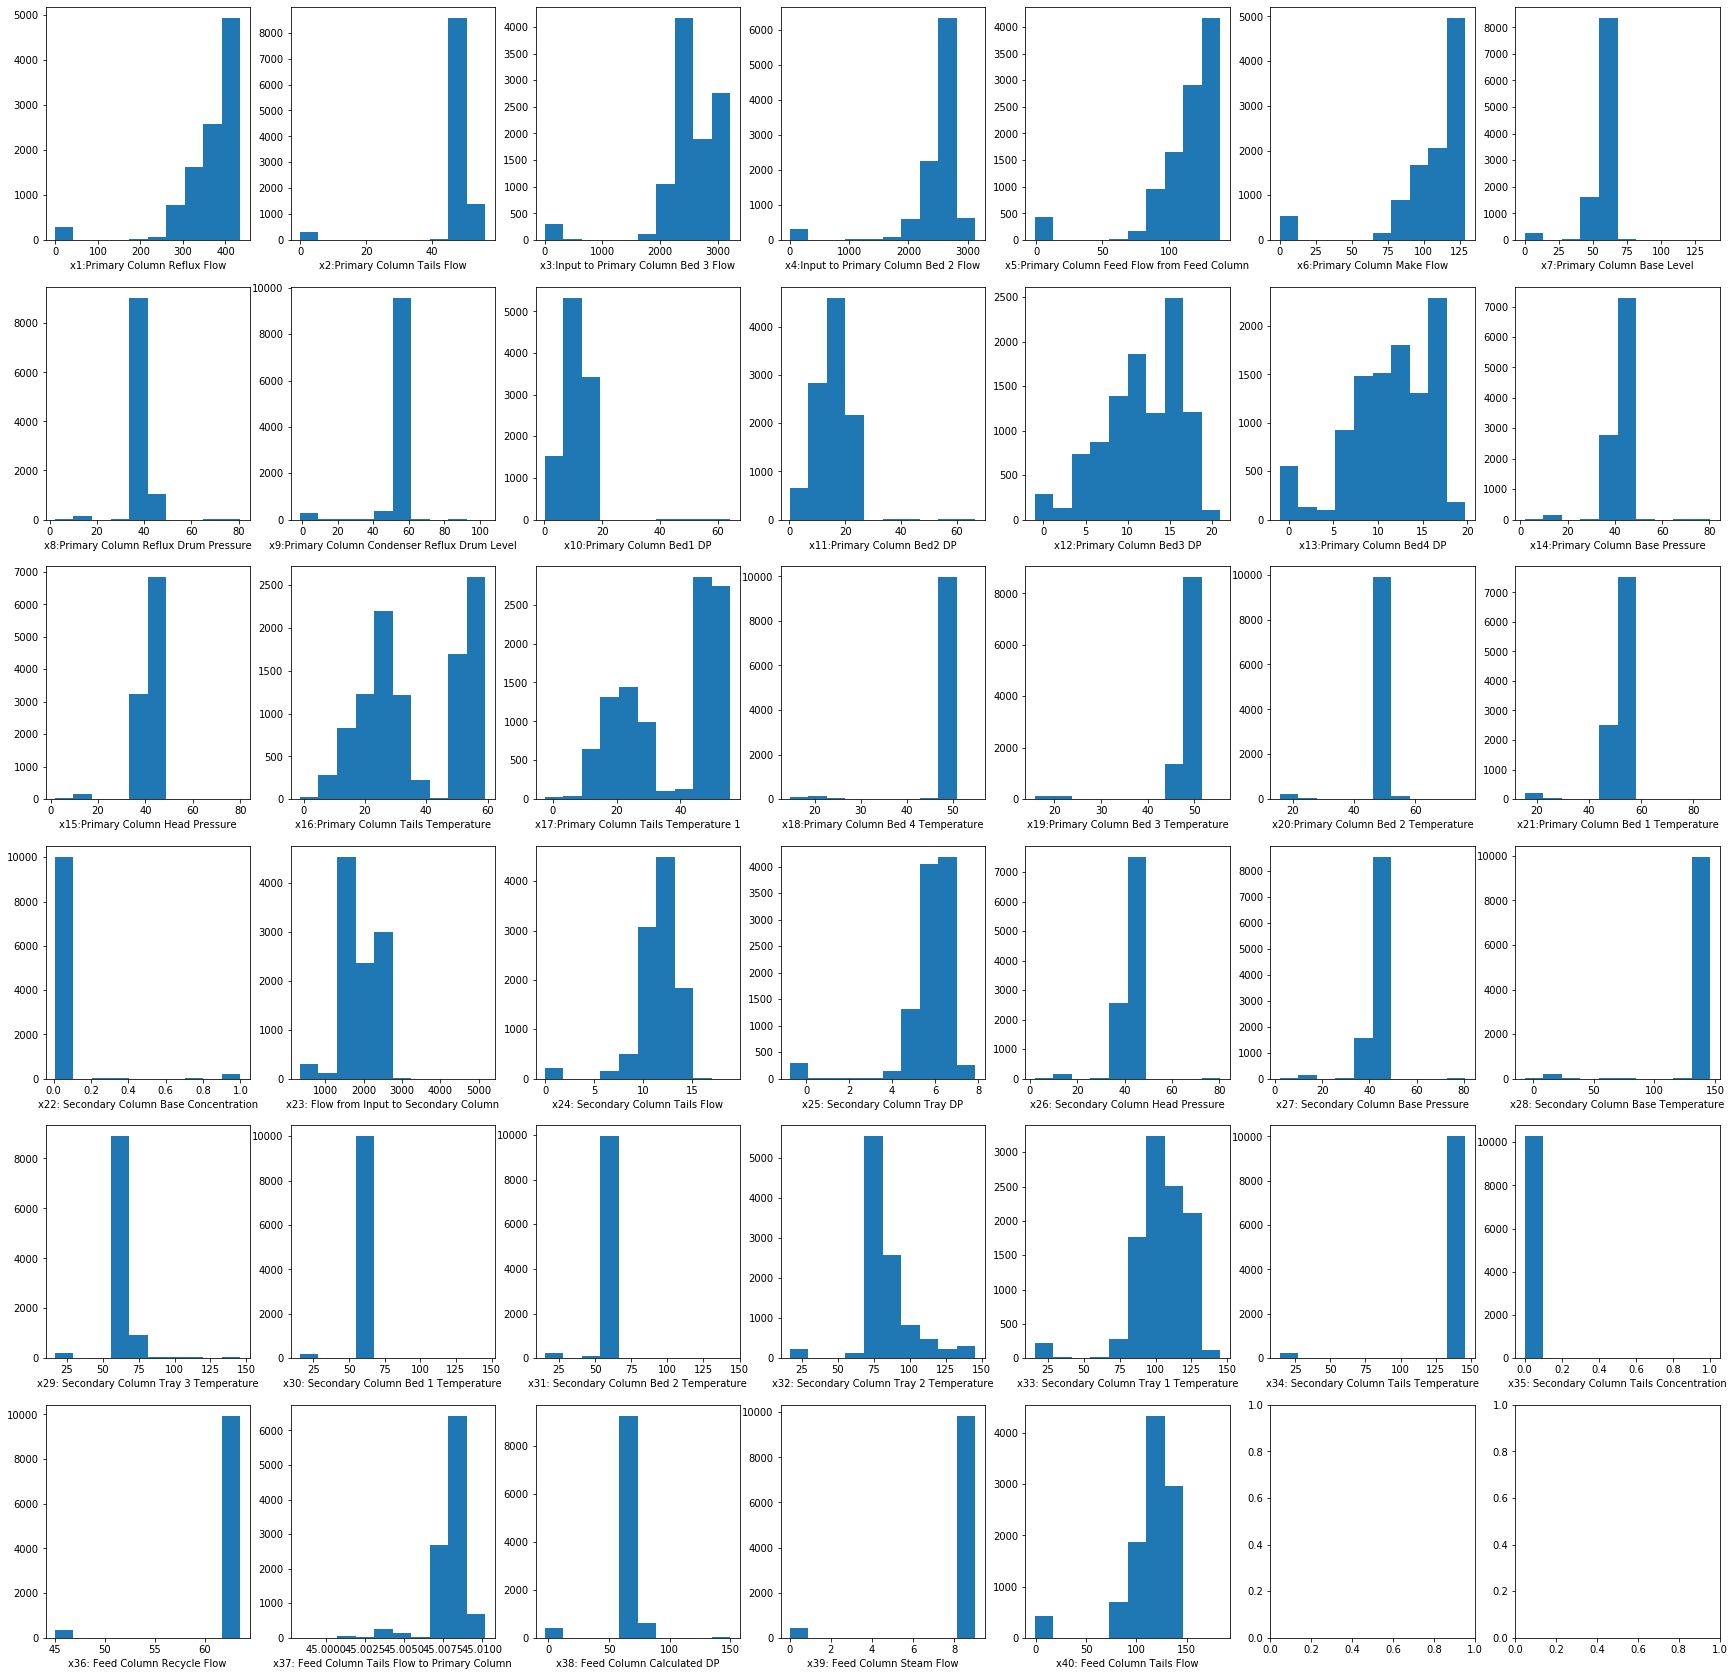

In [4]:
print('X dimensions: {}'.format(X.shape))
print('Feature names: {}'.format(x_names))
N = X.shape[-1]
n = int(np.sqrt(N))
fig, axes = plt.subplots(n, n+1, figsize = (5*n, 5*n))
ax_list = axes.ravel()
for i in range(N):
    ax_list[i].hist(X[:,i])
    ax_list[i].set_xlabel(x_names[i])

We can see that some features are normally distributed, while others have some obvious outliers or bimodal distribution.

### Discussion: Why might there by bimodal distributions in a chemical process?

We can also look for feature "correlations" through the covariance matrix. The covariance explains how features vary with each other. We won't go through the math here, but we will discuss the concepts:

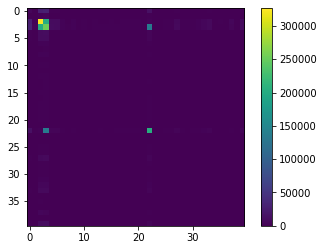

In [5]:
covar = np.cov(X.T)
fig,ax = plt.subplots()
c = ax.imshow(covar)
fig.colorbar(c);

This matrix tells us that some features seem highly correlated. We can look at some specific entries:

In [6]:
covar[2,2]
#covar[2,3]
#covar[1,3]
covar[1,1]

69.62160278605482

These numbers don't seem to mean much right now. The "covariance" between feature 2 and itself is higher than the covariance between feature 1 and itself. We will return to this later.

## Scaling Features and Outputs

We can see that different features have very different ranges, and different units (e.g. degrees, percent, count).  Scaling data is like "non-dimensionalizing" or normalizing for different units. This is often critical to ensure that certain variables are not weighted more than others.

Statistical methods don't know about physical units, so we can normalize or "scale" features to aid in comparison:

* rescaling: 0 = min, 1 = max
* mean scaling: 0 = mean, 1 = max, -1 = min
* **standard scaling: 0 = mean, 1 = standard deviation**
* unit vector: the length of each multi-dimensional vector is 1

See the [scikit-learn documentation](http://scikit-learn.org/stable/modules/preprocessing.html) for more examples and discussion.

Note that scaling is not always a good idea. Sometimes the data have units that are already consistent, or re-scaling can remove some important aspects. Figuring out the best scaling scheme is often achieved through trial and error.

In this case, we can look at the features and see they clearly have different units, and different ranges. For example, feature 1 (Primary column tails flow) ranges from 0 to 50, and feature 2 (Input to primary column Bed 3 Flow) ranges from 0 to ~3000. While we don't necessarily know the units (since this is proprietary data), we can see that there is a difference of range. This is why the covariance matrix didn't make much sense. We can rescale the data to put everything on similar scales.

### Discussion: What could go wrong with rescaling or mean scaling?

In [7]:
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)
print("Minimum: {}, Maximum: {}".format(X.min(), X.max()))
print("Minimum scaled: {}, Maximum scaled: {}".format(X_scaled.min(), X_scaled.max()))

Minimum: -6.91425, Maximum: 5176.74
Minimum scaled: -8.12009681442378, Maximum scaled: 38.10583689480496


Now, we can re-compute the covariance matrix with the rescaled data:

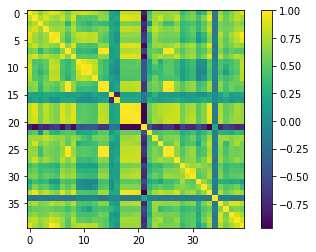

In [8]:
covar = np.cov(X_scaled.T)
fig,ax = plt.subplots()
c = ax.imshow(covar)
fig.colorbar(c);

The structure looks totally different! This is the "correlation matrix", which tells us how correlated different features are on a scale of -1 to 1. A correlation of -1 means they are perfectly anti-correlated, while 1 means they are perfectly correlated. If any features are perfectly correlated then they are linearly dependent (and won't count toward the rank).

In [9]:
covar.max()

1.0000971250971695

In [10]:
np.linalg.matrix_rank(X)

40

We see that the rank is 40, but the maximum covariance is 1. The reason is that the diagonal entries of the covariance matrix will always be 1 since features are perfectly correlated with themselves.

If the data has been "standard scaled" then the covariance matrix will range from -1 to 1, and is equivalent to a correlation matrix, which can also be computed directly from the data:

In [11]:
corr = np.corrcoef(X.T)
covar = np.cov(X_scaled.T)
np.isclose(corr, covar, 1e-4).all()

True

We will discuss the covariance/correlation matrix much more later, but when dealing with multi-dimensional data it is always good to check.

## Multi-Linear Regression

We can recall the general form of a linear regression model:

$y_i = \sum_j w_j X_{ij} + \epsilon_i$

Previously, we created features (columns of $X$) by transforming the original 1-dimensional input. In this case, we already have columns of $X$ provided from the data. We can use the same linear regression techniques from before:

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #create a linear regression model instance
model.fit(X_scaled, y) #fit the model
r2 = model.score(X_scaled, y) #get the "score", which is equivalent to r^2

yhat = model.predict(X_scaled) #create the model prediction

print("r^2 = {}".format(r2))

r^2 = 0.7168241690081087


We see that the $r^2$ score is 0.71, which is not terrible, but not great either.  We can't really visualize the model since we have 40-dimensional inputs. However, we can make a "parity plot":

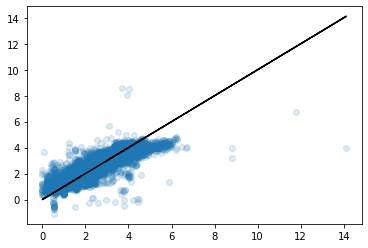

In [13]:
fig, ax = plt.subplots()

ax.scatter(y, yhat,alpha=0.15)
ax.plot(y,y, '-k');

This looks reasonable, although there are quite a few outliers. We should also remember that we trained on all the data, so this might be over-fit. We can quickly test using hold out cross validation: 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

model = LinearRegression() #create a linear regression model instance
model.fit(X_train, y_train) #fit the model to training data
r2_train = model.score(X_train, y_train) #get the score for training data

yhat = model.predict(X_test) #create the model prediction
r2_test = model.score(X_test, y_test) #get the score for testing data

print("r^2 train = {}".format(r2_train))
print("r^2 test = {}".format(r2_test))

r^2 train = 0.7299716125523974
r^2 test = 0.6672374584278158


We see that they are comparable, which indicates that we have not over-fit. We can also visualize both training and testing errors with a parity plot:

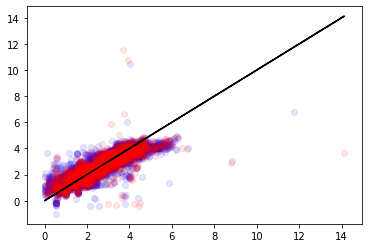

In [15]:
fig, ax = plt.subplots()

yhat_train = model.predict(X_train)
ax.scatter(y_train, yhat_train,alpha=0.1, c='b')
ax.scatter(y_test, yhat,alpha=0.1, c='r')

ax.plot(y,y, '-k');

We can see that these look comparable, which confirms that we have not over-fit the model. It is always a good idea to check the parity plot to see if any patterns stand out!

This basic linear regression model is simple, but by testing it we now have a **baseline model**. This tells us that if we have any results worse than this we have a really bad model! 

We see that the performance of the model is not great, and to improve things we will need to add some non-linearity. In 1-dimensional space we achieved this by adding transforms of the features as new features. However, for this is more challenging in a high-dimensional space since the number of features will scale with the number of dimension.

### Discussion: How many features would result if third-order interactions were considered?

Kernel-based methods are very commonly used for high-dimensional spaces because they account for non-linear interactions, but the number of features does not exceed the number of data points. In your homework you will explore the application of KRR to this dataset.

## Dimensionality Reduction

An alternative approach to creating high-dimensional models is to reduce the dimensionality. We will briefly look at some techniques here, and revisit this idea later in the course.

### Forward Selection

The simplest strategy to select or rank features is to try them one-by-one, and keep the best feature at each iteration:

In [16]:
N_features = 4
X_subset = X_scaled.copy()
x_names_subset = np.copy(x_names)
new_X = []
new_X_names = []

while len(new_X) < N_features:
    r2_list = []
    for j in range(X_subset.shape[1]):
        model = LinearRegression() #create a linear regression model instance
        xj = X_subset[:,j].reshape(-1,1)
        model.fit(xj, y) #fit the model
        r2 = model.score(xj, y) #get the "score", which is equivalent to r^2
        r2_list.append([r2, j])
    r2_list.sort() #sort lowest to highest
    r2_max, j_max = r2_list[-1] #select highest r2 value
    new_X.append(X_subset[:,j_max].copy())
    new_X_names.append(x_names_subset[j_max])
    np.delete(x_names_subset, j_max)
    X_subset = np.delete(X_subset, j_max, axis=1)
    
print('The {} most linearly correlated features are: {}'.format(N_features, new_X_names))

new_X = np.array(new_X).T

The 4 most linearly correlated features are: ['x10:Primary Column Bed1 DP', 'x5:Primary Column Feed Flow from Feed Column', 'x9:Primary Column Condenser Reflux Drum Level', 'x5:Primary Column Feed Flow from Feed Column']


We can see how the $r^2$ score changes with the reduced features:

In [17]:
model = LinearRegression() #create a linear regression model instance
model.fit(new_X, y) #fit the model
r2 = model.score(new_X, y) #get the "score", which is equivalent to r^2
print("r^2 = {}".format(r2))

r^2 = 0.5291187350299678


We see that with just 4 features the model performance is substantially reduced. We can keep increasing the number until it is comparable to the full model.

### Exercise: Use forward selection to determine the minimum number of features needed to get an $r^2=0.65$.

Be careful, since just because features are *linearly* correlated does not mean that they are *non-linearly* correlated. There is also no guarantee that we are not finding correlated features, since if one feature has a high correlation with the output, and is also correlated with another feature, then that feature will also be correlated with the output. One way to avoid this is to ensure that features are orthogonal using the eigenvectors of the covariance matrix.

In [18]:
from scipy.linalg import eigvals, eig

eigvals, eigvecs = eig(corr)

print(eigvals)
print(np.dot(eigvecs[:,1], eigvecs[:,1]))

[2.34052441e+01+0.j 4.18467850e+00+0.j 2.33189497e+00+0.j
 1.76263895e+00+0.j 1.36335613e+00+0.j 1.20647404e+00+0.j
 1.01834809e+00+0.j 9.05685161e-01+0.j 7.82566892e-01+0.j
 6.10463149e-01+0.j 3.47530730e-01+0.j 2.80455458e-01+0.j
 2.36849052e-01+0.j 2.16544576e-01+0.j 1.89968154e-01+0.j
 1.60761700e-01+0.j 1.48884172e-01+0.j 1.13320844e-01+0.j
 1.05664747e-01+0.j 9.52653929e-02+0.j 9.08781901e-02+0.j
 7.52340536e-02+0.j 6.42007155e-02+0.j 6.07057147e-02+0.j
 5.12602559e-02+0.j 3.50465495e-02+0.j 3.13477717e-02+0.j
 2.77621926e-02+0.j 2.56492205e-02+0.j 2.11399627e-02+0.j
 1.51029602e-02+0.j 1.25073823e-02+0.j 1.01495039e-02+0.j
 4.49361769e-03+0.j 3.70219711e-03+0.j 2.62771559e-03+0.j
 1.40665188e-03+0.j 9.42919677e-05+0.j 4.92952293e-05+0.j
 4.69580556e-05+0.j]
1.0000000000000002


It turns out that by taking the eigenvalues of the covariance matrix you are actually doing something called "principal component analysis". The eigenvectors of the covariance matrix identify the "natural" coordinate system of the data.

<center>
<img src="images/PCA.gif" width="500">
</center>

The eigenvalues provide the variance in each direction, and we can use this to determine how much variance each principal component contributes:

40.000000000000036
[5.85131103e-01 1.04616962e-01 5.82973742e-02 4.40659737e-02
 3.40839033e-02 3.01618510e-02 2.54587022e-02 2.26421290e-02
 1.95641723e-02 1.52615787e-02 8.68826826e-03 7.01138646e-03
 5.92122630e-03 5.41361439e-03 4.74920386e-03 4.01904250e-03
 3.72210430e-03 2.83302111e-03 2.64161866e-03 2.38163482e-03
 2.27195475e-03 1.88085134e-03 1.60501789e-03 1.51764287e-03
 1.28150640e-03 8.76163737e-04 7.83694293e-04 6.94054814e-04
 6.41230512e-04 5.28499069e-04 3.77574006e-04 3.12684559e-04
 2.53737597e-04 1.12340442e-04 9.25549278e-05 6.56928898e-05
 3.51662969e-05 2.35729919e-06 1.23238073e-06 1.17395139e-06]


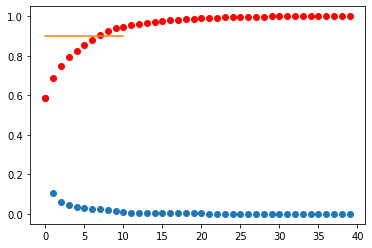

In [19]:
PCvals, PCvecs = eigvals, eigvecs
total_variance = np.sum(np.real(PCvals))
explained_variance = np.real(PCvals)/total_variance
print(total_variance)
print(explained_variance)

fig, ax = plt.subplots()
ax.plot(explained_variance, 'o')
ax.plot(np.cumsum(explained_variance),'or')
ax.plot([0,10],[0.9, 0.9]);

We can use this to say that 90% of the variance in the data is explained by the first 7 principal components.

Finally, we can "project" the data onto the principal components. This is equivalent to re-defining the axes of the data.

(10297, 40)


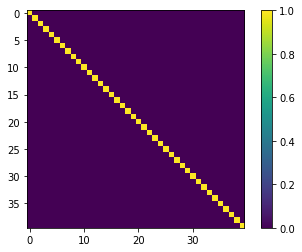

In [20]:
PC_projection = np.dot(X_scaled, PCvecs)
print(PC_projection.shape)

corr_PCs = np.corrcoef(PC_projection.T)
fig,ax = plt.subplots()
c = ax.imshow(corr_PCs)
fig.colorbar(c);

After projection, we still have 40 features but they are now orthogonal - there is no covariance! This means that each one contains unique information.

 We will talk a lot more about PCA throughout the course, but for now you should know:

* Principal component vectors are obtained from the eigenvalues of the covariance matrix
* Principal components are orthogonal
* Principal components explain the variance in multi-dimensional data
* Data can be projected onto principal components

## Principal Component Regression

We can also use the projected data as inputs to a regression model:

In [21]:
model = LinearRegression() #create a linear regression model instance
model.fit(PC_projection, y) #fit the model
r2 = model.score(PC_projection, y) #get the "score", which is equivalent to r^2
print("r^2 = {}".format(r2))

r^2 = 0.7168241690081087


Let's compare this to the original data:

In [22]:
model = LinearRegression() #create a linear regression model instance
model.fit(X_scaled, y) #fit the model
r2 = model.score(X_scaled, y) #get the "score", which is equivalent to r^2
print("r^2 = {}".format(r2))

r^2 = 0.7168241690081087


We see that the answer is the same. This is because we are still ultimately including all the same information. However, if we want to reduce the number of features we will see a difference:

In [23]:
N = 8

model_PC = LinearRegression() #create a linear regression model instance
model_PC.fit(PC_projection[:, :N], y) #fit the model
r2 = model_PC.score(PC_projection[:, :N], y) #get the "score", which is equivalent to r^2
print("r^2 PCA = {}".format(r2))

model = LinearRegression() #create a linear regression model instance
model.fit(X_scaled[:, :N], y) #fit the model
r2 = model.score(X_scaled[:, :N], y) #get the "score", which is equivalent to r^2
print("r^2 regular = {}".format(r2))

r^2 PCA = 0.5811123172545544
r^2 regular = 0.4756455003059684


### Discussion: Why is the model with principal components not always better than direct linear regression?

The PCA projection collects as much information as possible in each feature, and orders them by the amount of variance. We can also check them one-by-one to see how they correlate:

In [24]:
score_list = []
for j in range(PC_projection.shape[1]):
    model = LinearRegression() #create a linear regression model instance
    xj = PC_projection[:,j].reshape(-1,1)
    model.fit(xj, y) #fit the model
    r2 = model.score(xj, y) #get the "score", which is equivalent to r^2
    score_list.append([r2, j])
score_list.sort()
score_list.reverse()

for r, j in score_list:
    print("{} : r^2 = {}".format(j, r))

1 : r^2 = 0.20685135722275394
0 : r^2 = 0.1740523250716769
6 : r^2 = 0.06122482871680757
7 : r^2 = 0.060489894713565695
4 : r^2 = 0.04417209773857611
25 : r^2 = 0.01749733851902091
8 : r^2 = 0.016205721751365254
5 : r^2 = 0.013951580686418772
2 : r^2 = 0.013223153135118126
16 : r^2 = 0.013047707758552575
33 : r^2 = 0.011755340770004952
18 : r^2 = 0.009381481309652662
9 : r^2 = 0.009144490126668181
15 : r^2 = 0.008497745937737333
3 : r^2 = 0.007147079969638593
21 : r^2 = 0.006899441884438696
31 : r^2 = 0.0064596643421769295
22 : r^2 = 0.0051135909850485994
14 : r^2 = 0.003515332215412892
11 : r^2 = 0.0033082402426463098
39 : r^2 = 0.003210578115283802
38 : r^2 = 0.002510692114409574
10 : r^2 = 0.0023541786992695712
27 : r^2 = 0.0022663723214025877
32 : r^2 = 0.002216144465406411
13 : r^2 = 0.0019406439983039594
37 : r^2 = 0.0019400593063642058
20 : r^2 = 0.001816535620350446
28 : r^2 = 0.00147546784014152
12 : r^2 = 0.0009878389646386099
36 : r^2 = 0.00072562930060438
34 : r^2 = 0.00069

We see that the second principal component is actually the best, the first is the second best, and the seventh is third. This is because the principal components only use variance of the inputs, which may or may not correlate to the outputs.

It is common to use PCA or other dimensionality techniques prior to regression when working with high-dimensional data. It is often possible to construct models that have better performance with fewer input dimensions.